# 共通部分

## 必要なライブラリのインポート

In [54]:
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

## １次関数を定義する

In [55]:
def f(x, a, b):
    return a + b * x

## Googleドライブ内にあるColab Notebooksのパスを変数dirに定義する

In [56]:
dir = "/content/drive/MyDrive/Colab Notebooks/"

## Pandasを用いてデータフレームとしてcsvを読み込む

In [57]:
raw = pd.read_csv(dir+"mean_temperature_tokyo.csv", index_col=0)

# 課題１：東京気象台で観測された年平均気温のトレンド分析

In [58]:
# 年平均気温を計算
ann_ave = raw.copy()  # rawのコピーを作成
ann_ave["Yearly_mean"] = raw.mean(axis=1)  # 年平均気温の平均を追加

# 年平均気温のトレンド分析
popt, pcov = optimize.curve_fit(f, ann_ave.index, ann_ave["Yearly_mean"])

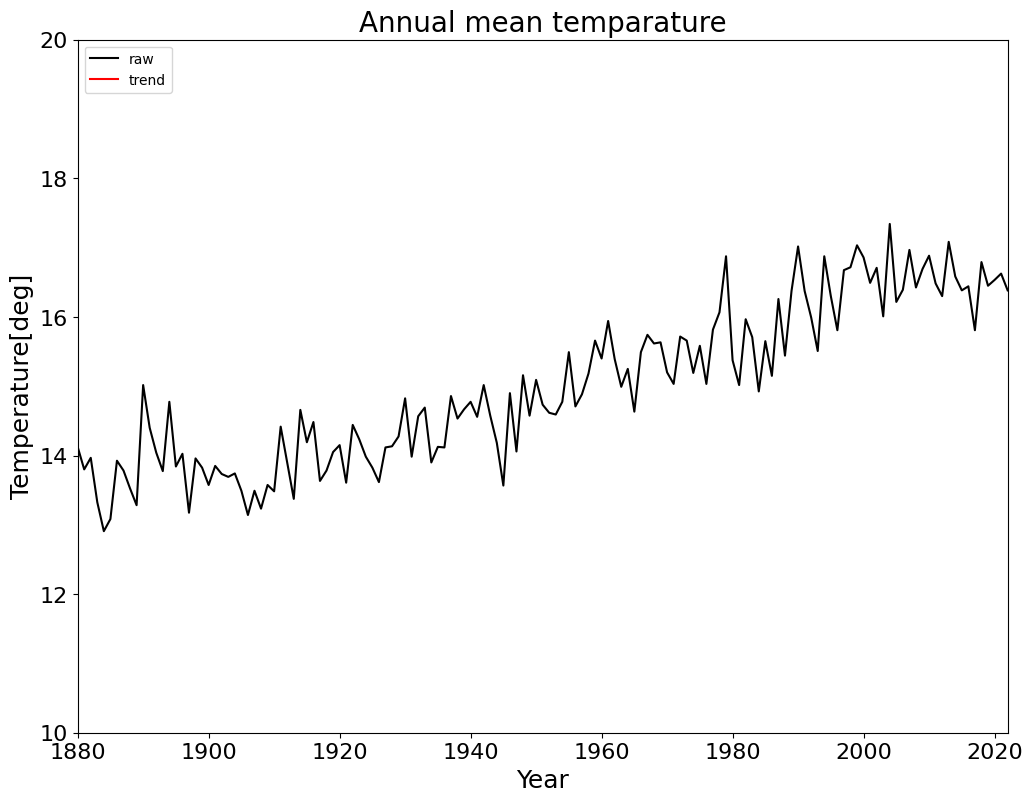

In [63]:
 # 横1200px、縦900pxのFigureを作成
plt.figure(figsize=(12, 9))

# 年平均気温の経年変化（線色は黒）を描画
plt.plot(ann_ave["Yearly_mean"], c='k', label="raw")

# 年平均気温のトレンド（線色は赤）を描画
plt.plot(ann_ave.index, f(ann_ave.index, popt[0], popt[1]), c="r", label="trend")

# x軸の範囲を1880年から2022年に設定
plt.xlim(raw.index[0], raw.index[-1])
# y軸の範囲を10から20に設定
plt.ylim(10, 20)

# 目盛のフォントサイズを16に指定
plt.tick_params(labelsize=16)

# x軸ラベル描画（フォントサイズは18に設定）
plt.xlabel("Year", fontsize=18)
# y軸ラベル描画（フォントサイズは18に設定）
plt.ylabel("Temperature[deg]", fontsize=18)

# タイトルを描画（フォントサイズは20に設定）
plt.title("Annual mean temparature", fontsize=20)
# 凡例を図の左上に作成（フォントサイズは16に設定）
plt.legend(loc="upper left")

In [64]:
# 画像を保存
plt.savefig(dir+"annual_mean_temp_trend.png")
# Figureを閉じる
plt.close()

# 課題２：東京気象台で観測された月平均気温のトレンド分析

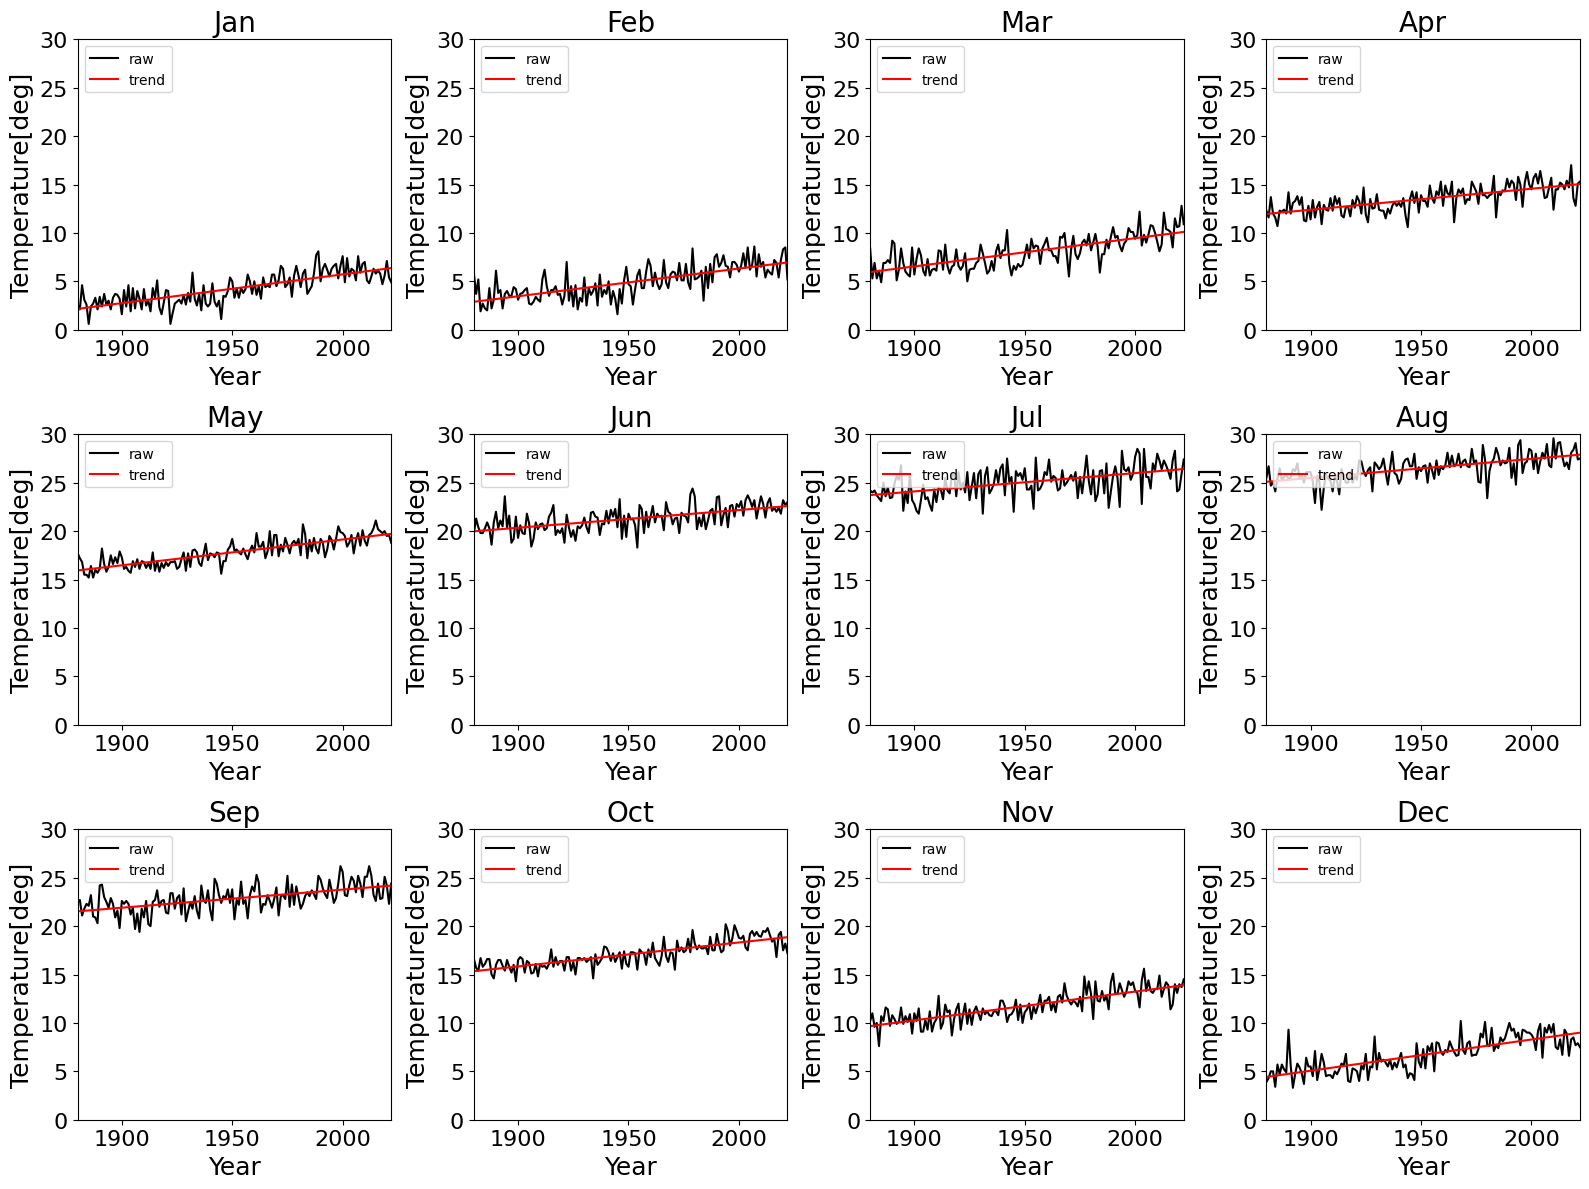

In [65]:
 # 横1600px、縦1200pxのFigureを作成
plt.figure(figsize=(16, 12))

# for文を用いてマルチパネルを作る
for n, mon in enumerate(raw.columns, start=1):
    # 年平均気温のトレンド分析
    popt, pcov = optimize.curve_fit(f, raw.index, raw[mon])

    # n番目のパネルを作る
    plt.subplot(3, 4, n)

    # 月平均気温の経年変化（線色は黒）を描画
    plt.plot(raw.index, raw[mon], c='k', label="raw")

    # 月平均気温のトレンド（線色は赤）を描画
    plt.plot(raw.index, f(raw.index, popt[0], popt[1]), c="r", label="trend")

    # x軸の範囲を1880年から2022年に設定
    plt.xlim(raw.index[0], raw.index[-1])
    # y軸の範囲を0から30に設定
    plt.ylim(0, 30)

    # 目盛のフォントサイズを16に指定
    plt.tick_params(labelsize=16)

    # x軸ラベル描画（フォントサイズは18に設定）
    plt.xlabel("Year", fontsize=18)
    # y軸ラベル描画（フォントサイズは18に設定）
    plt.ylabel("Temperature[deg]", fontsize=18)

    # タイトルを描画（フォントサイズは20に設定）
    plt.title(str(mon), fontsize=20)
    # 凡例を図の左上に作成（フォントサイズは16に設定）
    plt.legend(loc="upper left")

# 図の配置を自動修正
plt.tight_layout()

In [66]:
# 画像を保存
plt.savefig(dir+"monthly_temperature_trend.png")
# Figureを閉じる
plt.close()